In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://www.boxofficemojo.com/intl/uk/yearly/'

In [3]:
# Access the webpage content
r = requests.get(url)

In [4]:
# Parse the HTML page
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
# Choose the relevant table
table = soup.find_all('table')[4]

In [6]:
# Parse and store the data of every table row
lst = []
for row in table.find_all('tr'):
    s = pd.Series([data.text for data in row.find_all('td')])
    lst.append(s)

In [7]:
# Concatenate the data in a Pandas DataFrame and place the first row of the DataFrame as header. Use the .head() method to check your DataFrame.
data = pd.concat(lst, axis=1).T

# Grab the first row for the header
new_header = data.iloc[0]

# Take the data less the header row
data = data[1:]

# Set the header row as the df header
data.columns = new_header

data.head()

,Rank,Movie Title,Distributor,Gross,Release
1,1,Avengers: Endgame,Disney,"$114,918,897",4/25
2,2,The Lion King (2019),Disney,"$81,193,278",7/19
3,3,Toy Story 4,Disney,"$76,777,508",6/21
4,4,Captain Marvel,Disney,"$51,792,440",3/8
5,5,Aladdin (2019),Disney,"$46,396,534",5/22


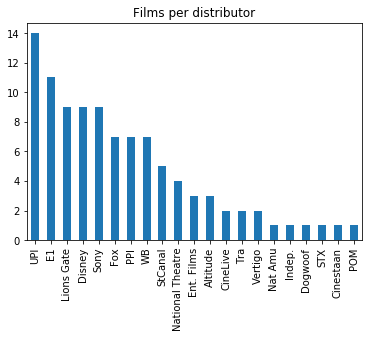

In [8]:
# Q1
data.Distributor.value_counts().plot(kind='bar', title='Films per distributor')
plt.show()

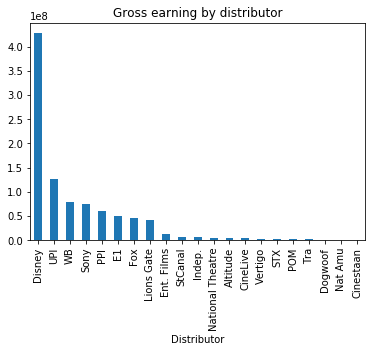

In [9]:
# Q2

# Remove the £ symbol and transform strings to integers
data['Gross'] = data['Gross'].apply(lambda x: int(x[1:].replace(',', '')))

# Group the data by Distributor and add the Gross value of their movies
data.groupby('Distributor')['Gross'].sum().sort_values(ascending=False).plot(kind='bar', title='Gross earning by distributor')

plt.show()